# Project Goal: Assess the risk associated with insuring freight shipments

## <center> Part 1: Exploring a Dataset</center>

In [32]:
 # Loading the packages I will need:

print("Loading packages...", end = '')

import numpy as np
import pandas as pd 
import missingno as msno
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print("Finished.")


Loading packages...Finished.


In [6]:
# Show all .csv files in the Data directory (csv files are the monthly data for each "Year folder")
data_directory = r'C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007'
print(data_directory)

for x in os.listdir(data_directory):
    if x.endswith('.csv'):
        print(x)


C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007
dot2_0107.csv
dot2_0207.csv
dot2_0307.csv
dot2_0407.csv
dot2_0507.csv
dot2_0607.csv
dot2_0707.csv
dot2_0807.csv
dot2_0907.csv
dot2_1007.csv
dot2_1107.csv
dot2_1207.csv


In [7]:
# Loading data to dataframe df. 

dataFile = 'dot2_0107.csv'

print("Loading the dataset...")

df = pd.read_csv(r'C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007\dot2_0107.csv')


print("Finished.")

Loading the dataset...
Finished.


In [8]:
#Statistics of the df data frame.

# dataframe.size
size = df.size
  
# dataframe.shape
shape = df.shape

# printing size and shape
print("Size = {}\nShape = {}".format(size, shape))
print('Rows: ', df.shape[0])
print('Cols: ', df.shape[1])

Size = 861798
Shape = (61557, 14)
Rows:  61557
Cols:  14


In [9]:

# First five rows of the dataset

df.head()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,3,3,NaN,XC,1220,145018,8644,7846,1.0,X,1,2007
1,1,AK,3,3,NaN,XQ,1220,5473,1000,461,1.0,X,1,2007
2,1,AK,3,5,NaN,XC,1220,203407,0,6186,1.0,X,1,2007
3,1,AK,3,5,NaN,XY,1220,73236,0,1348,1.0,X,1,2007
4,1,AK,5,3,NaN,XO,1220,3465,840,118,1.0,X,1,2007


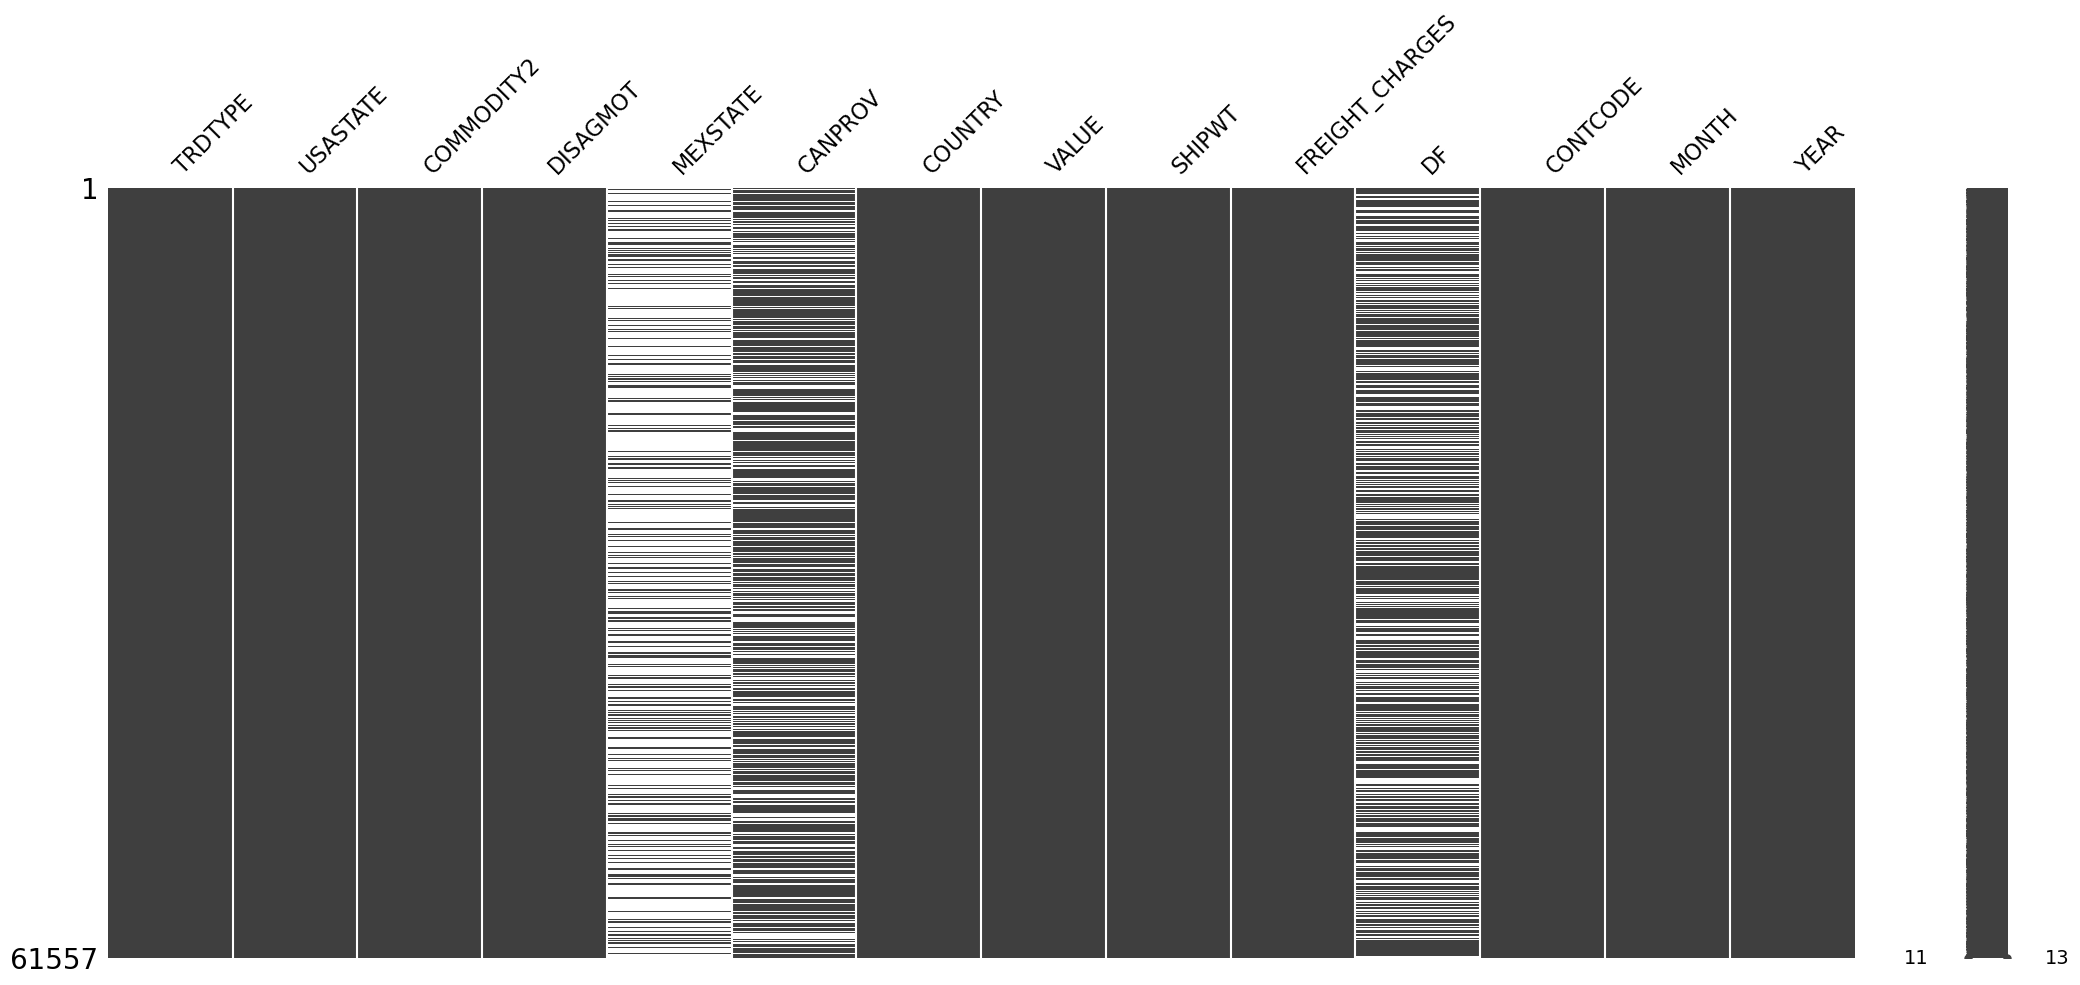

In [10]:
# Nullity matrix:
# The dark areas are where data is present; the white areas are where
# data is missing.

all = df.shape[0]

numRows = all

#Note: Does not handle more than 50 features so this justify the below code:

if df.shape[1] < 51 :
    %matplotlib inline
    all = df.shape[0]
    msno.matrix(df.sample(numRows))


<Axes: >

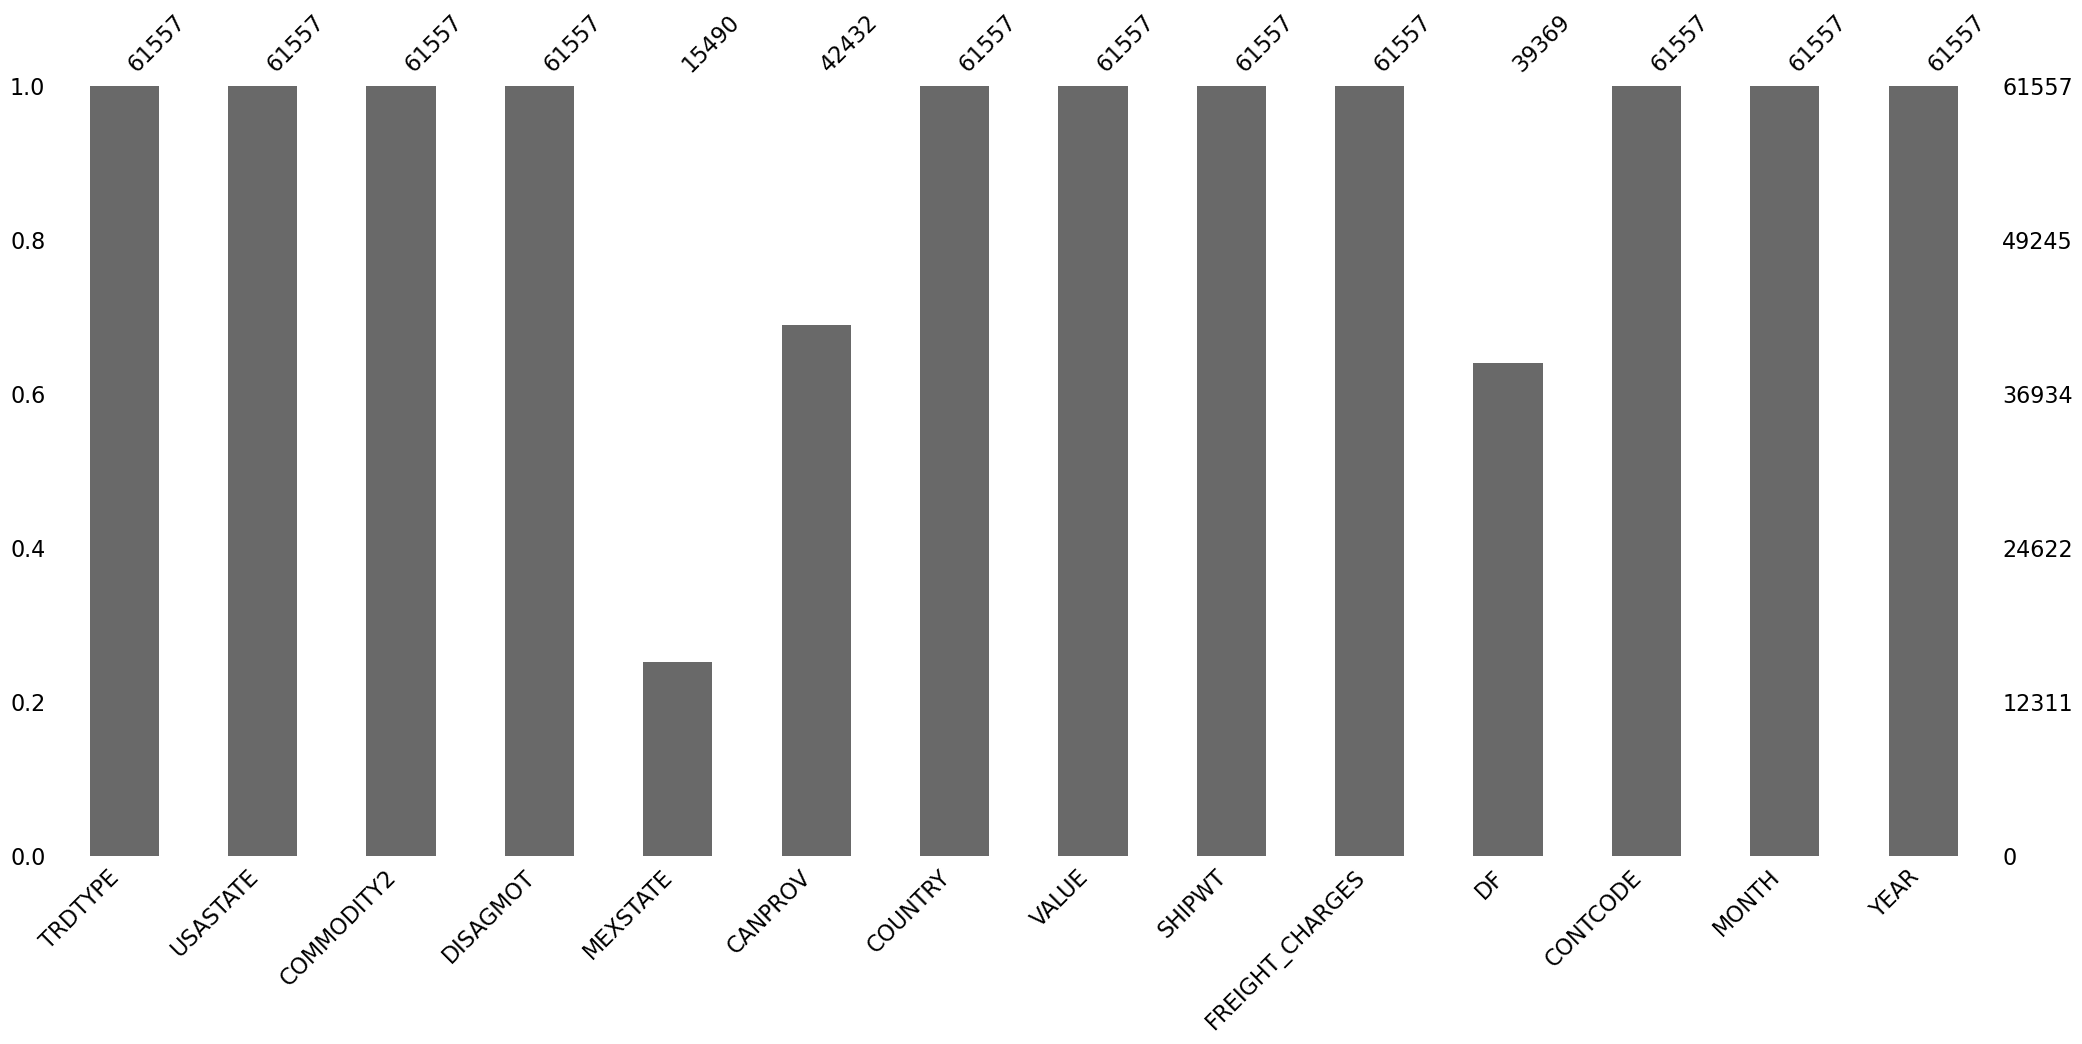

In [11]:
# Nullity with a bar chart format.

msno.bar(df.sample(numRows))

<Axes: >

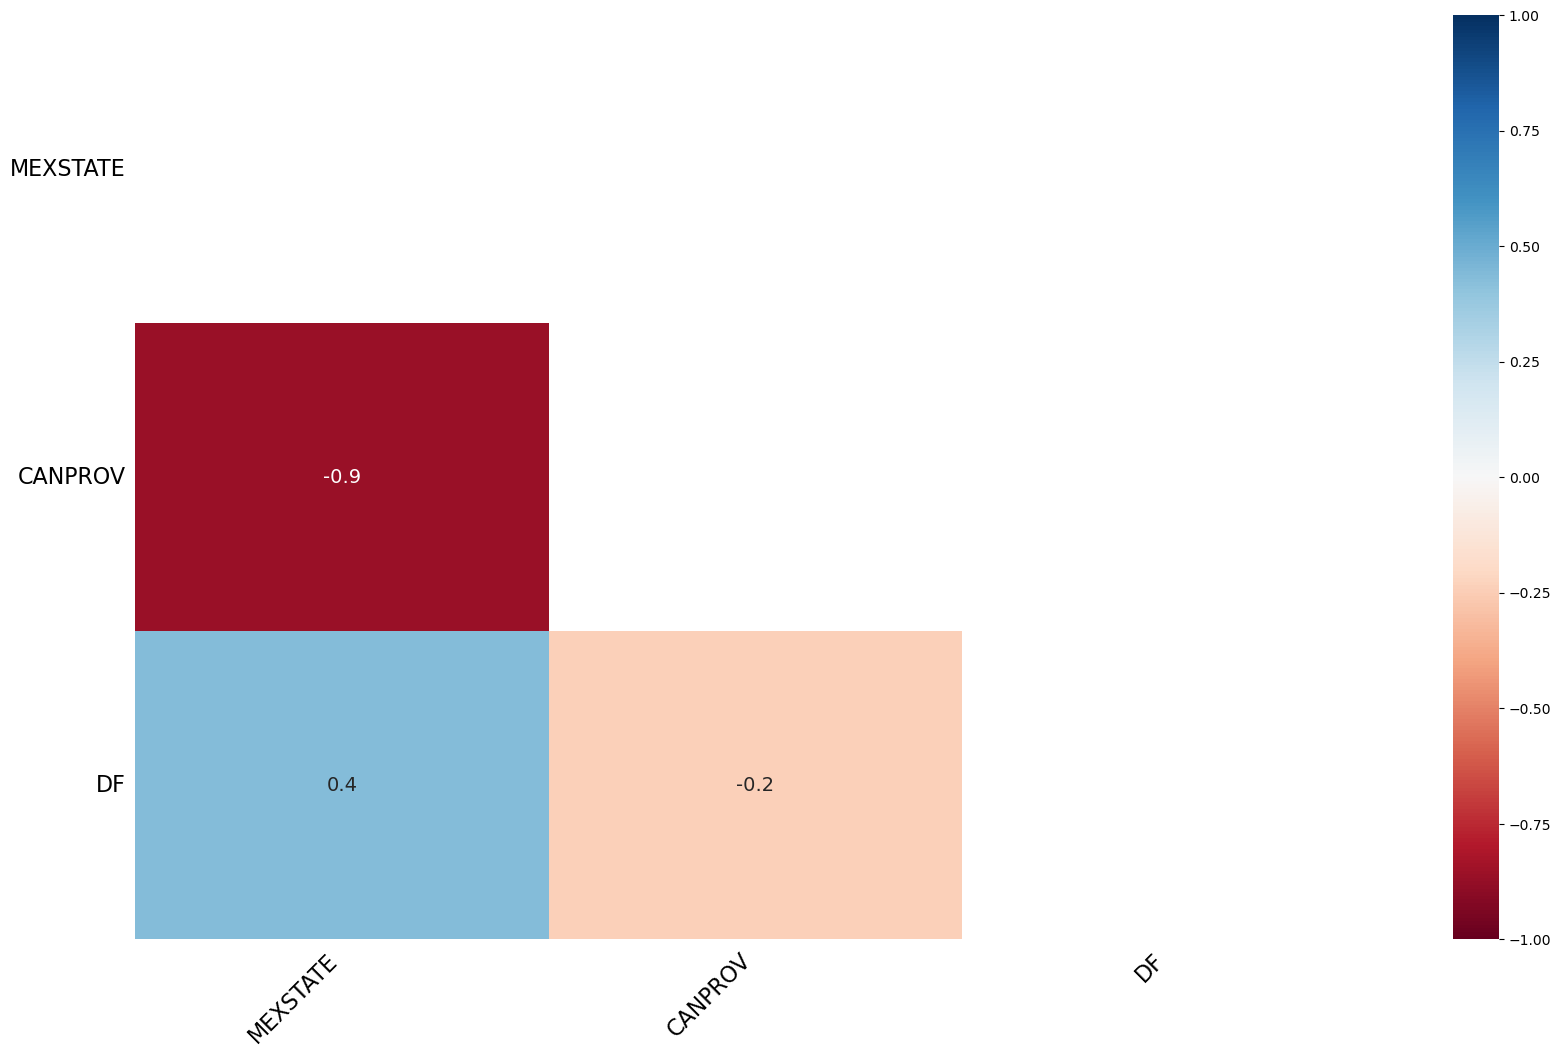

In [12]:
# Heatmap analysis of nullity:

msno.heatmap(df)

In [13]:
# Percentage of nullity (overall and by column):

totnull = df.isnull().sum().sum()
print("\nNumber of null values =", totnull, 'out of', size, 'total values, which is {:.5f}'.format(totnull / size * 100), "% of the data set.")


pd.set_option('display.max_rows', df.shape[1])
print("\nNull values in each feature\n(column) out of", shape[0], "rows:")
print(df.isnull().sum(), end = '')
# print the percentage of null values in each feature (column)
print("\n\nPercentage of null values in each\nfeature (column) out of", shape[0], "rows:")
print((df.isnull().sum() / shape[0]) * 100)
print('\n\nData types for each feature:')
df.dtypes


Number of null values = 87380 out of 861798 total values, which is 10.13927 % of the data set.

Null values in each feature
(column) out of 61557 rows:
TRDTYPE                0
USASTATE               0
COMMODITY2             0
DISAGMOT               0
MEXSTATE           46067
CANPROV            19125
COUNTRY                0
VALUE                  0
SHIPWT                 0
FREIGHT_CHARGES        0
DF                 22188
CONTCODE               0
MONTH                  0
YEAR                   0
dtype: int64

Percentage of null values in each
feature (column) out of 61557 rows:
TRDTYPE             0.000000
USASTATE            0.000000
COMMODITY2          0.000000
DISAGMOT            0.000000
MEXSTATE           74.836331
CANPROV            31.068766
COUNTRY             0.000000
VALUE               0.000000
SHIPWT              0.000000
FREIGHT_CHARGES     0.000000
DF                 36.044642
CONTCODE            0.000000
MONTH               0.000000
YEAR                0.000000
dtype: 

TRDTYPE              int64
USASTATE            object
COMMODITY2           int64
DISAGMOT             int64
MEXSTATE            object
CANPROV             object
COUNTRY              int64
VALUE                int64
SHIPWT               int64
FREIGHT_CHARGES      int64
DF                 float64
CONTCODE            object
MONTH                int64
YEAR                 int64
dtype: object

In [14]:
# Check for duplicated rows in the dataset
duplicated_rows = df.duplicated()

# Display the count of duplicated rows
print("Number of duplicated rows:", duplicated_rows.sum())

# Display the duplicated rows 
if duplicated_rows.any():
    duplicated_data = df[duplicated_rows]
    print("Duplicated Rows:")
    print(duplicated_data)

Number of duplicated rows: 0


In [15]:
# Removing MEXSTATE and CANPROV in the df since they do not have a big impact in my analysis (I already have COUNTRY as the column to differentiate Canada and Mexico)
dropCol = 'CANPROV'

df = df.drop([dropCol], axis = 1)

features = df.columns
features = features[0:len(df.columns)]

print('Columns after dropping', dropCol,":\n")
print(features)

Columns after dropping CANPROV :

Index(['TRDTYPE', 'USASTATE', 'COMMODITY2', 'DISAGMOT', 'MEXSTATE', 'COUNTRY',
       'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE', 'MONTH',
       'YEAR'],
      dtype='object')


In [16]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61557 entries, 0 to 61556
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRDTYPE          61557 non-null  int64  
 1   USASTATE         61557 non-null  object 
 2   COMMODITY2       61557 non-null  int64  
 3   DISAGMOT         61557 non-null  int64  
 4   MEXSTATE         15490 non-null  object 
 5   COUNTRY          61557 non-null  int64  
 6   VALUE            61557 non-null  int64  
 7   SHIPWT           61557 non-null  int64  
 8   FREIGHT_CHARGES  61557 non-null  int64  
 9   DF               39369 non-null  float64
 10  CONTCODE         61557 non-null  object 
 11  MONTH            61557 non-null  int64  
 12  YEAR             61557 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 6.1+ MB
None


In [17]:
# Unique null values in specific column:

featureName = 'TRDTYPE'

print('Null values in', featureName, '=', df[featureName].isnull().sum(), '\n')
dfDrop = df.loc[df[featureName].notnull()]
df2 = dfDrop[[featureName]].copy()
print(df2)

Null values in TRDTYPE = 0 

       TRDTYPE
0            1
1            1
2            1
3            1
4            1
...        ...
61552        2
61553        2
61554        2
61555        2
61556        2

[61557 rows x 1 columns]


In [18]:
# Null x Unique values analysis:

dclass = df[featureName]
dclass = dclass.unique()

dclass = dclass.astype(str)

print('Null values in', featureName, '=', df[featureName].isnull().sum(), '\n')
print('Unique values in', featureName, '=', len(dclass), '\n')
#print(dclass)
print('\nNumber of each unique value in', featureName, ': ')
print(featureName, ' Frequency ')
print(df[featureName].value_counts())

Null values in TRDTYPE = 0 

Unique values in TRDTYPE = 2 


Number of each unique value in TRDTYPE : 
TRDTYPE  Frequency 
1    39369
2    22188
Name: TRDTYPE, dtype: int64


In [19]:
# Descriptive statistics summary

print('Null values in', featureName, '=', df[featureName].isnull().sum(), '\n')
print('Unique values in', featureName, '=', len(dclass), '\n')
df2[featureName].describe()

Null values in TRDTYPE = 0 

Unique values in TRDTYPE = 2 



count    61557.000000
mean         1.360446
std          0.480134
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: TRDTYPE, dtype: float64

In [20]:
# Number of different counts for each value in the data feature.

print(df[featureName].value_counts())

1    39369
2    22188
Name: TRDTYPE, dtype: int64


Null values in TRDTYPE = 0 

Unique values in TRDTYPE = 2 



<Axes: xlabel='TRDTYPE', ylabel='Count'>

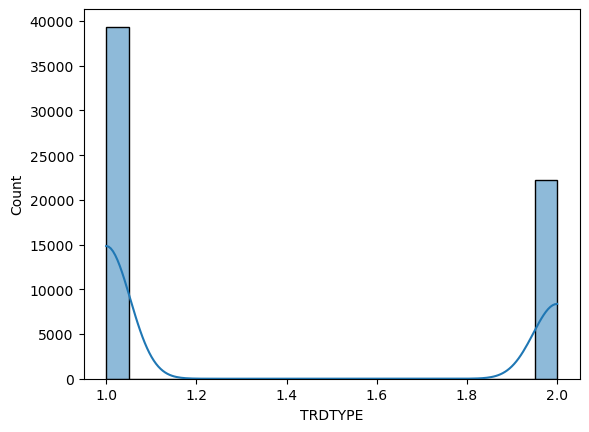

In [21]:
# Histogram Unique x Null values:

print('Null values in', featureName, '=', df[featureName].isnull().sum(), '\n')
print('Unique values in', featureName, '=', len(dclass), '\n')
sns.histplot(df2[featureName], kde = True)

In [22]:
# Column names check:

features = df.columns
features = features[0:len(df.columns)]
print(features)

Index(['TRDTYPE', 'USASTATE', 'COMMODITY2', 'DISAGMOT', 'MEXSTATE', 'COUNTRY',
       'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE', 'MONTH',
       'YEAR'],
      dtype='object')


In [23]:
# Specific columns analysis:

dclass = df['TRDTYPE']
dclass = dclass.unique()
print(dclass)
print(len(dclass))

[1 2]
2


In [24]:
df['DF'].tail

<bound method NDFrame.tail of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
61552    NaN
61553    NaN
61554    NaN
61555    NaN
61556    NaN
Name: DF, Length: 61557, dtype: float64>

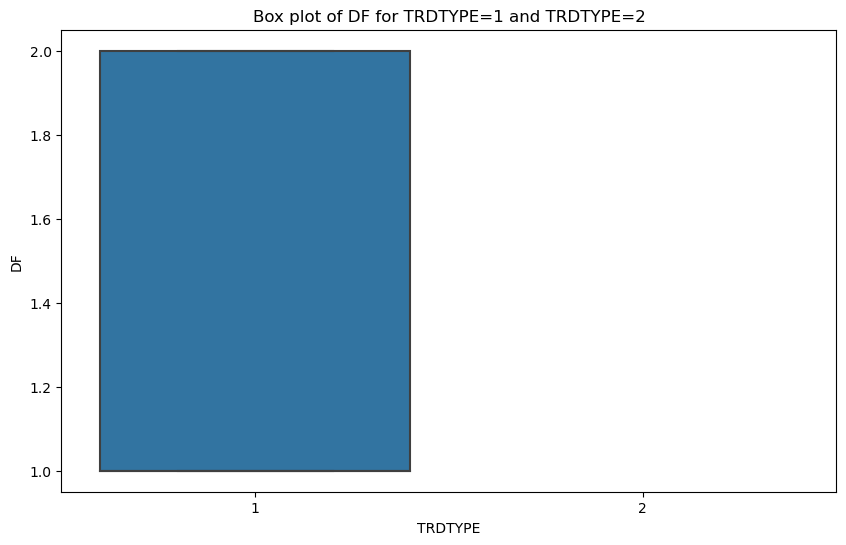

In [25]:
# Box plot for TRDTYPE=1 and TRDTYPE=2

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TRDTYPE', y='DF')
plt.title('Box plot of DF for TRDTYPE=1 and TRDTYPE=2')
plt.show()



In [26]:
# Cross-tabulation

cross_tab = pd.crosstab(df['DF'], df['TRDTYPE'], margins=True, margins_name='Total')
print(cross_tab)


TRDTYPE      1  Total
DF                   
1.0      29333  29333
2.0      10036  10036
Total    39369  39369


In [29]:
# Correlation matrix

correlation_matrix = df[['DF', 'TRDTYPE']].corr()
print(correlation_matrix)

          DF  TRDTYPE
DF       1.0      NaN
TRDTYPE  NaN      1.0


In [30]:
# Frequency of NaN values for TRDTYPE=2

nan_frequency = df[df['TRDTYPE'] == 2]['DF'].isna().sum()
total_rows = len(df[df['TRDTYPE'] == 2])
percentage_nan = (nan_frequency / total_rows) * 100
print(f"Percentage of NaN values for TRDTYPE=2: {percentage_nan:.2f}%")

Percentage of NaN values for TRDTYPE=2: 100.00%
